In [18]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 50)

# Data Loading & Pre-Processing

## load in the df

In [19]:
# Update the function to clean the data
def clean_data(csv_file):
    # Load the csv file
    df = pd.read_csv(csv_file)
    
    # Rename columns to more manageable names
    df = df.rename(columns={'Please enter your full name (First & Last)': 'doctor', 'Please enter the case number': 'pt'})
    
    # Standardize doctor names: make them lowercase
    df['doctor'] = df['doctor'].str.lower()
    
    # Fix misspellings of doctor names
    df['doctor'] = df['doctor'].replace({
        'aaron pula': 'aaron paul',
        'vanes carlota andreu arasa': 'vanesa carlota andreu arasa',
        'vanesa carlota andreu': 'vanesa carlota andreu arasa',
        'vanesa carlotaandreu arasa': 'vanesa carlota andreu arasa',
        # Add more replacements here if necessary
    })
    #cleaned_data['doctor'] = cleaned_data['doctor'].replace('65', 'asim mian')

    # Standardize case numbers: remove 'case' (with and without a trailing space) and convert to integers where possible
    df['pt'] = df['pt'].str.replace('case ', '', case=False).str.replace('case', '', case=False).str.strip()  # Remove 'case' prefix (with and without space) and trailing spaces
    df['pt'] = pd.to_numeric(df['pt'], errors='coerce')  # Convert to numeric, set non-numeric values to NaN
    
    # Drop rows where 'pt' is NaN
    df = df.dropna(subset=['pt'])
    
    # Convert 'pt' to int (now safe to do so since we removed non-numeric values)
    df['pt'] = df['pt'].astype(int)
    
    return df

def missing_cases_for_doctor(dataframe, doctor_name):
    # Get the case numbers for the given doctor
    doctor_cases = set(dataframe[dataframe['doctor'] == doctor_name]['pt'])

    # Define the full set of case numbers
    full_case_set = set(range(1, 71))  # Assuming case numbers are from 1 to 70

    # Find the missing cases for the given doctor
    missing_cases = full_case_set - doctor_cases

    return missing_cases


# Clean the new csv data
cleaned_data = clean_data('ADRDRadiologistTask_DATA_2023-08-12_1555.csv')

cleaned_data


,id,redcap_survey_identifier,adrd_radiologist_task_timestamp,participant_id,pt,doctor,date,sym_hemi,hemorrhages,infarcts,hyperintensity_swi,ft_asymmetry,ft_volume_loss,frontal_lobe_general,anterior_insula,right_anterior_insula,anterior_cingulate_gyrus,right_anterior_cingulate_g,precentral_gyrus,right_precentral_gyrus,caudate_nucleus,right_caudate_nucleus,t_atrophy_mesial,mesial_temporal_rating,left_mesial_temporal_lobe,...,tbi_plus,other_2,adrd_radiologist_task_complete,adrd_neurologist_task_timestamp,dr_id,part_id,part_id_2,today_date,f_l_name,normal_cognition,impaired_n_mci,mci,dem,alz,lbd,vasc,prion,ftld,nph,systemic,psych,tbi,other,comments,adrd_neurologist_task_complete
4,5,NaN,7/6/2023 18:22,1,1,asim mian,7/6/2023,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,3.0,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,6,NaN,7/6/2023 18:33,2,2,asim mian,7/6/2023,1.0,0.0,2.0,3.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,7,NaN,7/6/2023 18:41,3,3,asim mian,7/6/2023,1.0,0.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,8,NaN,7/6/2023 18:48,4,4,asim mian,7/6/2023,1.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,9,NaN,7/6/2023 18:53,5,5,asim mian,7/6/2023,1.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,496,NaN,8/7/2023 23:23,69,69,bindu setty,8/7/2023,1.0,2.0,0.0,4.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,...,5.0,6.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
491,497,NaN,8/7/2023 23:30,70,70,bindu setty,8/7/2023,1.0,2.0,0.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,...,5.0,5.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
492,498,NaN,8/12/2023 9:23,58,58,bindu setty,8/12/2023,1.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,...,5.0,5.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
493,499,NaN,8/12/2023 10:21,2,2,saurabh rohatgi,8/12/2023,1.0,2.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,...,50.0,52.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
cleaned_data.iloc[:, 7:-34].shape

(490, 45)

## data dict

In [21]:
radiologist_data_dict_df = pd.read_csv("ADRDRadiologistTask_DataDictionary_2023-09-14.csv")

# Function to convert a string to a dictionary
def str_to_dict(entry):
    if not isinstance(entry, str):
        return entry
    result = {}
    segments = entry.split("|")
    for segment in segments:
        segment = segment.strip()
        if "," in segment:
            key, value = map(str.strip, segment.split(","))
            result[key] = value
        else:
            return "slider"
    return result

radiologist_data_dict_df

,Variable / Field Name,Form Name,Section Header,Field Type,Field Label,"Choices, Calculations, OR Slider Labels",Field Note,Text Validation Type OR Show Slider Number,Text Validation Min,Text Validation Max,Identifier?,Branching Logic (Show field only if...),Required Field?,Custom Alignment,Question Number (surveys only),Matrix Group Name,Matrix Ranking?,Field Annotation
0,id,adrd_radiologist_task,NaN,text,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
1,participant_id,adrd_radiologist_task,Thank you for participating in our study! Ther...,text,Please enter the case number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
2,pt,adrd_radiologist_task,NaN,text,Please re-enter the case number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
3,doctor,adrd_radiologist_task,NaN,text,Please enter your full name (First & Last),NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
4,date,adrd_radiologist_task,NaN,text,Please enter the date you are completing this ...,NaN,NaN,date_mdy,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,systemic,adrd_neurologist_task,NaN,slider,"Infectious (HIV included), metabolic, substanc...",0 | | 100,NaN,number,NaN,NaN,NaN,NaN,y,RH,NaN,NaN,NaN,NaN
77,psych,adrd_neurologist_task,NaN,slider,"Psychiatric including schizophrenia, depressio...",0 | | 100,NaN,number,NaN,NaN,NaN,NaN,y,RH,NaN,NaN,NaN,NaN
78,tbi,adrd_neurologist_task,NaN,slider,"TBI (including moderate/severe TBI, repetitive...",0 | | 100,NaN,number,NaN,NaN,NaN,NaN,y,RH,NaN,NaN,NaN,NaN
79,other,adrd_neurologist_task,NaN,slider,"Other conditions (Neoplasms, MSA, essential tr...",0 | | 100,NaN,number,NaN,NaN,NaN,NaN,y,RH,NaN,NaN,NaN,NaN


In [22]:
'''
for k in range(region_ratings_data_array.shape[2]):
    map_dict = radiologist_data_dict_df[radiologist_data_dict_df["Variable / Field Name"] == region_columns[k]]["Choices, Calculations, OR Slider Labels"].iloc[0]
    if map_dict is not np.nan:
        map_dict = str_to_dict(map_dict)
        for j in range(region_ratings_data_array.shape[1]):
            for i in range(region_ratings_data_array.shape[0]):
                if str(int(region_ratings_data_array[i,j,k])) not in map_dict:
                    region_ratings_data_array[i,j,k] = np.nan
                elif map_dict[str(int(region_ratings_data_array[i,j,k]))] == 'Cannot Assess':
                    region_ratings_data_array[i,j,k] = np.nan

region_ratings_data_array
'''

'\nfor k in range(region_ratings_data_array.shape[2]):\n    map_dict = radiologist_data_dict_df[radiologist_data_dict_df["Variable / Field Name"] == region_columns[k]]["Choices, Calculations, OR Slider Labels"].iloc[0]\n    if map_dict is not np.nan:\n        map_dict = str_to_dict(map_dict)\n        for j in range(region_ratings_data_array.shape[1]):\n            for i in range(region_ratings_data_array.shape[0]):\n                if str(int(region_ratings_data_array[i,j,k])) not in map_dict:\n                    region_ratings_data_array[i,j,k] = np.nan\n                elif map_dict[str(int(region_ratings_data_array[i,j,k]))] == \'Cannot Assess\':\n                    region_ratings_data_array[i,j,k] = np.nan\n\nregion_ratings_data_array\n'

In [23]:
region_columns = list(cleaned_data.iloc[:, 7:-34].columns)


In [24]:
region_names = []
for i in range(len(region_columns)):
    name = radiologist_data_dict_df[radiologist_data_dict_df['Variable / Field Name'] == region_columns[i]]['Field Label'].iloc[0]
    region_names.append(name)
region_names

['Are the hemispheres symmetrical?',
 'Are there prior hemorrhages present?',
 'Are there prior infarcts present?',
 'Are there hyperintensities present in the T2 FLAIR sequence?',
 'Is there asymmetry?',
 'Atrophy/volume loss in the frontal lobe',
 'Frontal lobe (general)',
 'Left anterior insula',
 'Right anterior insula',
 'Left anterior cingulate gyrus',
 'Right Anterior cingulate gyrus',
 'Left precentral gyrus',
 'Right precentral gyrus',
 'Left caudate nucleus',
 'Right caudate nucleus',
 'Is there mesial temporal lobe atrophy?',
 'Mesial Temporal lobe atrophy (rating) ',
 'Left mesial temporal lobe',
 'Right mesial temporal lobe',
 'Left hippocampus',
 'Right hippocampus',
 'Left amygdala',
 'Right amygdala',
 'Atrophy of left parahippocampus?',
 'Atrophy of right parahippocampus?',
 'Is there non-mesial temporal lobe atrophy?',
 'Non-Mesial Temporal Lobe Atrophy (rating)',
 'Left temporal lobe',
 'Right temporal lobe',
 'Left lateral temporal lobe',
 'Right lateral temporal lo

In [25]:
columns_to_rename = cleaned_data.columns[7:-34]

# Make sure the lengths of columns to rename and new names are the same
if len(columns_to_rename) != len(region_names):
    raise ValueError("Mismatch between the number of columns to rename and the new column names provided.")

# Update the DataFrame with the new column names
cleaned_data.columns = cleaned_data.columns[:7].tolist() + region_names + cleaned_data.columns[-34:].tolist()

cleaned_data.head()  # To verify the changes



,id,redcap_survey_identifier,adrd_radiologist_task_timestamp,participant_id,pt,doctor,date,Are the hemispheres symmetrical?,Are there prior hemorrhages present?,Are there prior infarcts present?,Are there hyperintensities present in the T2 FLAIR sequence?,Is there asymmetry?,Atrophy/volume loss in the frontal lobe,Frontal lobe (general),Left anterior insula,Right anterior insula,Left anterior cingulate gyrus,Right Anterior cingulate gyrus,Left precentral gyrus,Right precentral gyrus,Left caudate nucleus,Right caudate nucleus,Is there mesial temporal lobe atrophy?,Mesial Temporal lobe atrophy (rating),Left mesial temporal lobe,...,tbi_plus,other_2,adrd_radiologist_task_complete,adrd_neurologist_task_timestamp,dr_id,part_id,part_id_2,today_date,f_l_name,normal_cognition,impaired_n_mci,mci,dem,alz,lbd,vasc,prion,ftld,nph,systemic,psych,tbi,other,comments,adrd_neurologist_task_complete
4,5,NaN,7/6/2023 18:22,1,1,asim mian,7/6/2023,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,3.0,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,6,NaN,7/6/2023 18:33,2,2,asim mian,7/6/2023,1.0,0.0,2.0,3.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,7,NaN,7/6/2023 18:41,3,3,asim mian,7/6/2023,1.0,0.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,8,NaN,7/6/2023 18:48,4,4,asim mian,7/6/2023,1.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,9,NaN,7/6/2023 18:53,5,5,asim mian,7/6/2023,1.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [26]:
binary_region_questions = {
    "Atrophy/volume loss in the frontal lobe": ['Frontal lobe (general)', 'Left anterior insula',
       'Right anterior insula', 'Left anterior cingulate gyrus',
       'Right Anterior cingulate gyrus', 'Left precentral gyrus', 'Right precentral gyrus',
       'Left caudate nucleus', 'Right caudate nucleus'],
    "Is there mesial temporal lobe atrophy?": ['Mesial Temporal lobe atrophy (rating) ','Left mesial temporal lobe',
       'Right mesial temporal lobe', 'Left hippocampus', 'Right hippocampus',
       'Left amygdala', 'Right amygdala', 'Atrophy of left parahippocampus?',
       'Atrophy of right parahippocampus?'],
    "Is there non-mesial temporal lobe atrophy?": ['Non-Mesial Temporal Lobe Atrophy (rating)', 'Left temporal lobe',
       'Right temporal lobe', 'Left lateral temporal lobe',
       'Right lateral temporal lobe', 'Anterior temporal lobe',
       'Posterior temporal lobe', 'Left fusiform gyrus',
       'Right fusiform gyrus', 'Left middle and inferior temporal gyrus',
       'Right middle and  inferior temporal gyrus'],
    "Is there parietal lobe atrophy?": ['left parietal lobe atrophy (general)',
       'right parietal lobe atrophy (general)',],
    "Is there occipital lobe atrophy?": ['Atrophy in the occipital lobe'],
}

for binary_col, regions in binary_region_questions.items():
    if binary_col in cleaned_data.columns:
        cleaned_data.loc[cleaned_data[binary_col] == 0, regions] = cleaned_data[regions].fillna(1)


## create a consensus rating

In [27]:
# create one dataframe that contains the aggregated data for each case across the 7 doctors using the mode

# Group by case number and aggregate the data

def get_mode(series):
    return series.mode()[0] if not series.mode().empty else None

consensus_rating_df = cleaned_data.groupby('pt').agg(get_mode)
consensus_rating_df.head()

,id,redcap_survey_identifier,adrd_radiologist_task_timestamp,participant_id,doctor,date,Are the hemispheres symmetrical?,Are there prior hemorrhages present?,Are there prior infarcts present?,Are there hyperintensities present in the T2 FLAIR sequence?,Is there asymmetry?,Atrophy/volume loss in the frontal lobe,Frontal lobe (general),Left anterior insula,Right anterior insula,Left anterior cingulate gyrus,Right Anterior cingulate gyrus,Left precentral gyrus,Right precentral gyrus,Left caudate nucleus,Right caudate nucleus,Is there mesial temporal lobe atrophy?,Mesial Temporal lobe atrophy (rating),Left mesial temporal lobe,Right mesial temporal lobe,...,tbi_plus,other_2,adrd_radiologist_task_complete,adrd_neurologist_task_timestamp,dr_id,part_id,part_id_2,today_date,f_l_name,normal_cognition,impaired_n_mci,mci,dem,alz,lbd,vasc,prion,ftld,nph,systemic,psych,tbi,other,comments,adrd_neurologist_task_complete
pt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,None,7/11/2023 22:42,1,aaron paul,7/24/2023,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,...,0.0,0.0,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
2,6,None,7/11/2023 22:55,2,aaron paul,7/24/2023,1.0,0.0,2.0,3.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0.0,0.0,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
3,7,None,7/11/2023 23:05,3,aaron paul,7/24/2023,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
4,8,None,7/11/2023 23:16,4,aaron paul,7/24/2023,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0
5,9,None,7/11/2023 23:37,5,aaron paul,7/24/2023,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0


## creating a 3d np array

In [28]:
# Import necessary libraries
import numpy as np


region_columns = list(cleaned_data.iloc[:, 7:-34].columns)


# Map the doctor names to array indices
unique_doctors = cleaned_data['doctor'].unique()
doctors = [
    "juan small",
    "chad farris",
    "asim mian",
    "saurabh rohatgi",
    "vanesa carlota andreu arasa",
    "aaron paul",
    "bindu setty"
]

# Creating a dictionary mapping each doctor to their respective index
doctor_index_mapping = {doctor: index for index, doctor in enumerate(doctors)}


# Create an empty 7 (doctors) x 70 (cases) x r (r regions) numpy array
region_ratings_data_array = np.empty((len(unique_doctors), cleaned_data['pt'].nunique(), len(region_columns)))

# Populate the region_ratings_data_array with case numbers and radiologist ratings
for index, row in cleaned_data.iterrows():
    doctor_name = row['doctor']
    case_number = row['pt']
    doctor_index = doctor_index_mapping[doctor_name]
    disease_labels = row[region_columns]
    region_ratings_data_array[doctor_index, case_number - 1, :] = disease_labels.values


#region_ratings_data_array = np.nan_to_num(region_ratings_data_array, nan =-1)
region_ratings_data_array

array([[[ 1.,  0.,  2., ...,  1., nan,  1.],
        [ 1.,  0.,  2., ...,  1., nan,  1.],
        [ 1.,  0.,  2., ...,  1., nan,  1.],
        ...,
        [ 1.,  0.,  1., ...,  1., nan,  1.],
        [ 1.,  0.,  1., ...,  1., nan,  1.],
        [ 1.,  0.,  0., ...,  1., nan,  2.]],

       [[ 1.,  0.,  2., ...,  2.,  3.,  2.],
        [ 1.,  0.,  2., ...,  2.,  3.,  2.],
        [ 1.,  0.,  1., ...,  1., nan,  2.],
        ...,
        [ 1.,  0.,  0., ...,  1., nan,  1.],
        [ 1.,  2.,  1., ...,  1., nan,  1.],
        [ 1.,  0.,  1., ...,  1., nan,  1.]],

       [[ 1.,  0.,  2., ...,  1., nan,  2.],
        [ 1.,  0.,  2., ...,  1., nan,  1.],
        [ 1.,  0.,  1., ...,  1., nan,  1.],
        ...,
        [ 1.,  0.,  0., ...,  1., nan,  1.],
        [ 1.,  2.,  0., ...,  1., nan,  1.],
        [ 1.,  0.,  0., ...,  1., nan,  1.]],

       ...,

       [[ 2.,  0.,  2., ...,  1., nan,  1.],
        [ 1.,  0.,  2., ...,  1., nan,  1.],
        [ 1.,  0.,  2., ...,  1., nan,  1.

## Diagnosis

In [29]:
# Import necessary libraries
import numpy as np

# Define the columns to read from the DataFrame
rating_columns = [
    "Alzheimer's (including Down Syndrome)",
    'LBD (Dementia with Lewy bodies and Parkinson\'s disease dementia)',
    'Vascular brain injury or vascular dementia including stroke',
    'Prion disease (CJD, other)',
    'FTLD and its variants, including CBD and PSP, and with or without ALS',
    'NPH',
    'Infectious (HIV included), metabolic, substance abuse / alcohol, medications, systemic disease, delirium',
    'Psychiatric including schizophrenia, depression, bipolar, anxiety, PTSD',
    'TBI (including moderate/severe TBI, repetitive head injury, CTE)',
    'Other conditions (Neoplasms, MSA, essential tremor, Huntington, Seizures, etc.)'
]

redcap_columns = ["alz_ds",	"lbd_lb_pdd",	"vasdem",	"prion_d",	"ftld_v",	"nph_2",	"infec_plus",	"pysch_plus",	"tbi_plus",	"other_2"]

# Define the columns to read from the CSV
diagnosis_columns = [
    'AD_lb',
    'LBD_lb',
    'VD_lb',
    'PRD_lb',
    'FTD_lb',
    'NPH_lb',
    'SEF_lb',
    'PSY_lb',
    'TBI_lb',
    'ODE_lb'
]

# Map the doctor names to array indices
unique_doctors = cleaned_data['doctor'].unique()
doctor_index_mapping = {doctor: index for index, doctor in enumerate(unique_doctors)}

# Create an empty 5 (doctors) x 70 (cases) x 10 (10 etiologies) numpy array
data_array = np.empty((len(unique_doctors), cleaned_data['pt'].nunique(), len(rating_columns)))

# Populate the data_array with case numbers and radiologist ratings
for index, row in cleaned_data.iterrows():
    doctor_name = row['doctor']
    case_number = row['pt']
    doctor_index = doctor_index_mapping[doctor_name]
    disease_labels = row[redcap_columns]
    data_array[doctor_index, case_number-1, :] = disease_labels.values


# Load the confirmed diagnosis cases
diagnosis_cases = pd.read_csv('clinician_review_cases_converted_radio.csv', usecols=diagnosis_columns)

data_array.shape

(7, 70, 10)

In [30]:
# create a nAD, which is max of the columns prion, vasc, and ftd
cleaned_data['nAD'] = cleaned_data[['prion_d', 'vasdem', 'ftld_v']].max(axis=1)

data_array_new = np.empty((len(unique_doctors), cleaned_data['pt'].nunique(), 2))# the only diagnoses are AD and nAD

for n, rad in enumerate(data_array):
    for i in range(len(rad)):
        data_array_new[n, i, 0] = rad[i, 0]
        nAD = max(rad[i, 3], rad[i, 4], rad[i, 5])
        data_array_new[n, i, 1] = nAD

In [31]:
from scipy.stats import spearmanr

AD_corrs = {}
nAD_corrs = {}
# compute inter-rater reliability for the diagnoses
for i, rad1 in enumerate(unique_doctors):
    for k, rad2 in enumerate(unique_doctors[i+1:], start=i+1):
        # compute spearman correlation between the two radiologists rating for AD and nAD
        ad1 = data_array[i, :, 0]
        ad2 = data_array[k, :, 0]
        n_ad1 = data_array[i, :, 1]
        n_ad2 = data_array[k, :, 1]
        
        ad_corr = spearmanr(ad1, ad2)[0]
        n_ad_corr = spearmanr(n_ad1, n_ad2)[0]
        print(f"Inter-rater reliability for {rad1} and {rad2} for AD: {ad_corr}")
        print(f"Inter-rater reliability for {rad1} and {rad2} for nAD: {n_ad_corr}")
        AD_corrs[(rad1, rad2)] = ad_corr
        nAD_corrs[(rad1, rad2)] = n_ad_corr

# compute mean and 95% CI by bootstrapping

# def bootstrap_mean_ci(data, num_bootstrap_samples=10000, ci=0.95):
#     bootstrap_means = np.zeros(num_bootstrap_samples)
#     for i in range(num_bootstrap_samples):
#         bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
#         bootstrap_means[i] = np.mean(bootstrap_sample)
    
#     mean = np.mean(data)
#     ci_lower = np.percentile(bootstrap_means, (1 - ci) / 2 * 100)
#     ci_upper = np.percentile(bootstrap_means, (1 + ci) / 2 * 100)
    
#     return mean, (ci_lower, ci_upper)

# # Compute mean and 95% CI for AD correlations
# ad_mean, ad_ci = bootstrap_mean_ci(AD_corrs)
# print(f"AD correlations - Mean: {ad_mean:.4f}, 95% CI: ({ad_ci[0]:.4f}, {ad_ci[1]:.4f})")

# # Compute mean and 95% CI for nAD correlations
# nad_mean, nad_ci = bootstrap_mean_ci(nAD_corrs)
# print(f"nAD correlations - Mean: {nad_mean:.4f}, 95% CI: ({nad_ci[0]:.4f}, {nad_ci[1]:.4f})")

def bootstrap_mean_ci_correlations(corr_dict, unique_doctors, num_bootstrap_samples=10000, ci=0.95):
    bootstrap_means = np.zeros(num_bootstrap_samples)
    n_radiologists = len(unique_doctors)
    
    # Precompute all possible pairs of radiologists
    all_pairs = list(corr_dict.keys())
    
    for i in range(num_bootstrap_samples):
        # Sample radiologists with replacement
        sampled_radiologists = np.random.choice(unique_doctors, size=n_radiologists, replace=True)
        # Get all unique pairs of sampled radiologists
        sample_pairs = set()
        for idx1 in range(len(sampled_radiologists)):
            for idx2 in range(idx1 + 1, len(sampled_radiologists)):
                rad1 = sampled_radiologists[idx1]
                rad2 = sampled_radiologists[idx2]
                if rad1 != rad2:
                    # Sort the tuple to match the keys in corr_dict
                    pair = tuple(sorted((rad1, rad2)))
                    sample_pairs.add(pair)
        # Retrieve correlations for these pairs
        sample_correlations = []
        for pair in sample_pairs:
            if pair in corr_dict:
                sample_correlations.append(corr_dict[pair])
            elif (pair[1], pair[0]) in corr_dict: # reverse the pair
                sample_correlations.append(corr_dict[(pair[1], pair[0])])
            else:
                # If the pair doesn't exist (should not happen if all pairs are precomputed)
                raise ValueError(f"Pair {pair} not found in correlation dictionary.")
        # Compute mean correlation for this bootstrap sample
        if sample_correlations:
            bootstrap_means[i] = np.mean(sample_correlations)
        else:
            # Assign NaN if no correlations are found (e.g., only one unique radiologist sampled)
            bootstrap_means[i] = np.nan
    # Remove NaN values
    bootstrap_means = bootstrap_means[~np.isnan(bootstrap_means)]
    # Compute mean and confidence intervals
    mean = np.mean(bootstrap_means)
    ci_lower = np.percentile(bootstrap_means, (1 - ci) / 2 * 100)
    ci_upper = np.percentile(bootstrap_means, (1 + ci) / 2 * 100)
    return mean, (ci_lower, ci_upper)

# Compute mean and 95% CI for AD correlations
ad_mean, ad_ci = bootstrap_mean_ci_correlations(AD_corrs, unique_doctors)
print(f"AD correlations - Mean: {ad_mean:.4f}, 95% CI: ({ad_ci[0]:.4f}, {ad_ci[1]:.4f})")

# Compute mean and 95% CI for nAD correlations
n_ad_mean, n_ad_ci = bootstrap_mean_ci_correlations(nAD_corrs, unique_doctors)
print(f"nAD correlations - Mean: {n_ad_mean:.4f}, 95% CI: ({n_ad_ci[0]:.4f}, {n_ad_ci[1]:.4f})")

Inter-rater reliability for asim mian and saurabh rohatgi for AD: 0.4761808216484209
Inter-rater reliability for asim mian and saurabh rohatgi for nAD: 0.046092149235953034
Inter-rater reliability for asim mian and vanesa carlota andreu arasa for AD: 0.5501176739524821
Inter-rater reliability for asim mian and vanesa carlota andreu arasa for nAD: 0.08353153764512294
Inter-rater reliability for asim mian and chad farris for AD: 0.5423030816771359
Inter-rater reliability for asim mian and chad farris for nAD: 0.07910000986501814
Inter-rater reliability for asim mian and aaron paul for AD: 0.25144426024833016
Inter-rater reliability for asim mian and aaron paul for nAD: 0.04954970841379604
Inter-rater reliability for asim mian and bindu setty for AD: 0.44742825202958797
Inter-rater reliability for asim mian and bindu setty for nAD: 0.20898617023036675
Inter-rater reliability for asim mian and juan small for AD: 0.3593679470101174
Inter-rater reliability for asim mian and juan small for nA

# Initial statistical analysis and EDA

In [32]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import pointbiserialr

## distribution of atrophy ratings

In [33]:
# #plot histograms of the ratings for each region
# for col in cleaned_data.columns[7:-34]:
#     plt.figure(figsize=(5, 3))
#     sns.histplot(cleaned_data[col], bins=10)
#     plt.title(col)
#     plt.xlabel("Rating")
#     plt.ylabel("Frequency")
#     # make the col name safe
#     plt.savefig(f"dist/region_names{col.replace('/', '_')}" + ".png")
#     plt.close()

# interrater reliability

In [34]:
import numpy as np

def bootstrap_mean_ci_from_corr_matrix(corr_matrix, num_bootstrap_samples=10000, ci=0.95):
    """
    Perform bootstrapping on a correlation matrix to compute the mean correlation and its confidence interval,
    properly handling the zeros in the lower triangle and ones on the diagonal.
    
    Parameters:
    - corr_matrix (np.ndarray): Symmetric correlation matrix with ones on the diagonal and zeros in the lower triangle.
    - num_bootstrap_samples (int): Number of bootstrap samples to generate.
    - ci (float): Confidence level for the confidence interval (e.g., 0.95 for 95% CI).
    
    Returns:
    - mean (float): Mean of the bootstrap distribution of mean correlations.
    - ci_bounds (tuple): Lower and upper bounds of the confidence interval.
    """
    n_radiologists = corr_matrix.shape[0]
    radiologist_indices = np.arange(n_radiologists)
    bootstrap_means = np.zeros(num_bootstrap_samples)
    
    # Extract the valid correlation coefficients (upper triangle excluding the diagonal)
    upper_triangle_indices = np.triu_indices(n_radiologists, k=1)
    valid_correlations = corr_matrix[upper_triangle_indices]
    
    # Create a mapping from radiologist index pairs to correlation coefficients
    pair_to_corr = {}
    for idx, (rad1, rad2) in enumerate(zip(*upper_triangle_indices)):
        pair_to_corr[(rad1, rad2)] = valid_correlations[idx]
    
    for i in range(num_bootstrap_samples):
        # Sample radiologists with replacement
        sampled_radiologists = np.random.choice(radiologist_indices, size=n_radiologists, replace=True)
        
        # Generate all unique pairs among the sampled radiologists
        sample_pairs = set()
        for idx1 in range(len(sampled_radiologists)):
            for idx2 in range(idx1 + 1, len(sampled_radiologists)):
                rad1 = sampled_radiologists[idx1]
                rad2 = sampled_radiologists[idx2]
                if rad1 != rad2:
                    # Since we only have upper triangle indices, ensure rad1 < rad2
                    if rad1 < rad2:
                        pair = (rad1, rad2)
                    else:
                        pair = (rad2, rad1)
                    sample_pairs.add(pair)
        
        # Retrieve correlations for these pairs
        sample_correlations = []
        for rad1, rad2 in sample_pairs:
            # Only include correlations from the upper triangle (rad1 < rad2)
            if (rad1, rad2) in pair_to_corr:
                corr = pair_to_corr[(rad1, rad2)]
                # Exclude placeholder zeros and ones
                if corr != 0 and corr != 1:
                    sample_correlations.append(corr)
                else:
                    raise ValueError(f"Invalid correlation value found: {corr}")
        
        # Compute mean correlation for this bootstrap sample
        if sample_correlations:
            bootstrap_means[i] = np.mean(sample_correlations)
        else:
            # Assign NaN if no valid pairs are found
            bootstrap_means[i] = np.nan

    # Remove NaN values from bootstrap means
    bootstrap_means = bootstrap_means[~np.isnan(bootstrap_means)]
    if bootstrap_means.size == 0:
        return np.nan, (np.nan, np.nan)
    else:
        # Compute mean and confidence intervals
        mean = np.mean(bootstrap_means)
        ci_lower = np.percentile(bootstrap_means, ((1 - ci) / 2) * 100)
        ci_upper = np.percentile(bootstrap_means, (ci + (1 - ci) / 2) * 100)
        ci_bounds = (ci_lower, ci_upper)
    
    return mean, ci_bounds

# Example usage with your correlation matrix
corr_matrix = np.array([
    [1.0,        -0.08127923,  0.29875272,  0.08930809,  0.08711806,  0.23497268,  0.27317767],
    [0.0,         1.0,         -0.07053456, -0.05209323, -0.08638684, -0.08127923, -0.05209323],
    [0.0,         0.0,          1.0,         0.12309149,  0.27216553,  0.29875272, -0.08206099],
    [0.0,         0.0,          0.0,         1.0,         0.7537784, 0.0945615,  -0.06060606],
    [0.0,         0.0,          0.0,         0.0,         1.0,         0.20908335, -0.10050378],
    [0.0,         0.0,          0.0,         0.0,         0.0,         1.0,         0.08930809],
    [0.0,         0.0,          0.0,         0.0,         0.0,         0.0,         1.0       ]
])

mean, ci_bounds = bootstrap_mean_ci_from_corr_matrix(corr_matrix)
print(f"Mean Correlation: {mean:.4f}")
print(f"95% Confidence Interval: ({ci_bounds[0]:.4f}, {ci_bounds[1]:.4f})")


Mean Correlation: 0.1026
95% Confidence Interval: (-0.0199, 0.2707)


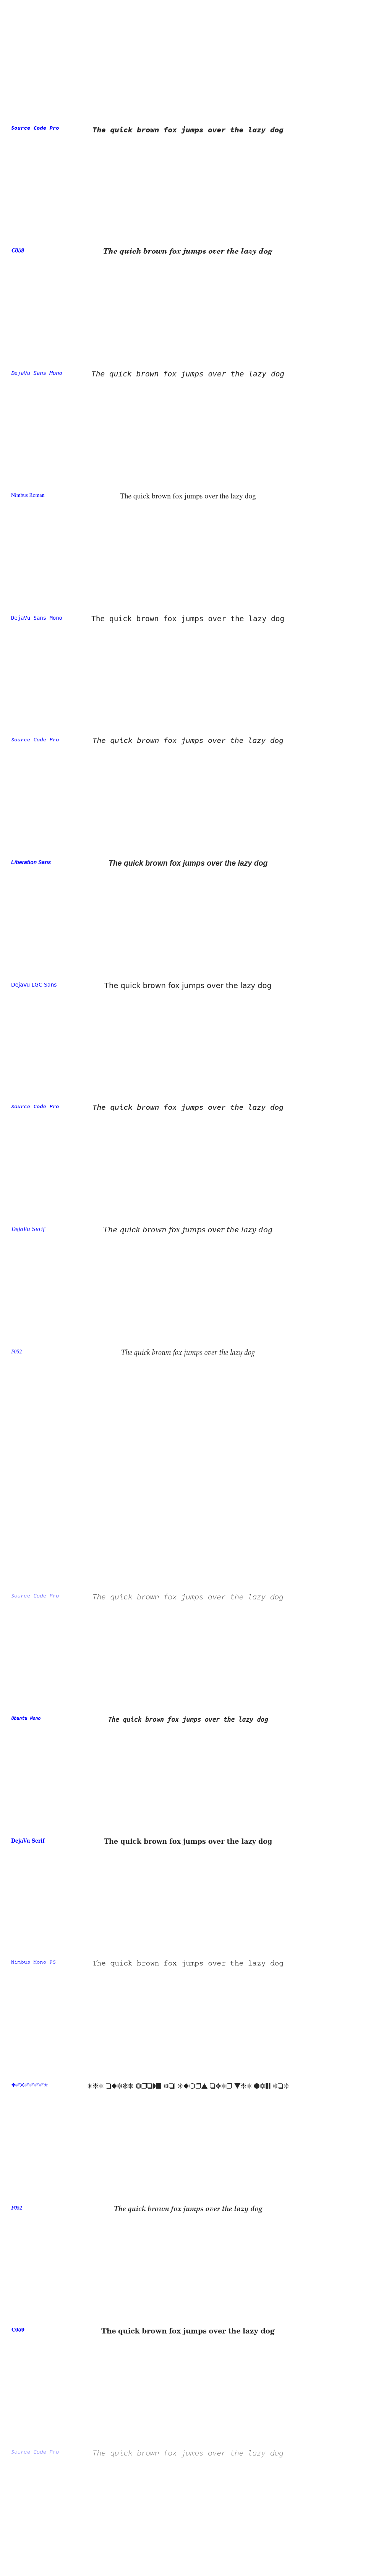

In [58]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Get the list of available font family names
available_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# Set up a simple example text to display in each font
example_text = "The quick brown fox jumps over the lazy dog"

# Create a figure and loop through a subset of fonts to display them
plt.figure(figsize=(10, len(available_fonts) * 0.5))

# Loop through fonts and print an example of each
for idx, font_path in enumerate(available_fonts[:20]):  # Limiting to the first 20 fonts for display purposes
    font_prop = fm.FontProperties(fname=font_path)
    font_name = font_prop.get_name()
    
    plt.text(0.5, 1 - (idx + 1) / (len(available_fonts[20:40]) + 1), example_text, fontproperties=font_prop,
             fontsize=14, ha='center', va='top')
    
    plt.text(0.02, 1 - (idx + 1) / (len(available_fonts[20:40]) + 1), font_name, fontproperties=font_prop,
             fontsize=10, ha='left', va='top', color='blue')

# Remove axes and display the plot
plt.axis('off')
plt.tight_layout()
plt.show()


/scratch/33368.1.cds/ipykernel_3702681/723919245.py:139: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_coeff, _ = pearsonr(filtered_rad_1, filtered_rad_2)
/scratch/33368.1.cds/ipykernel_3702681/723919245.py:139: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_coeff, _ = pearsonr(filtered_rad_1, filtered_rad_2)
/scratch/33368.1.cds/ipykernel_3702681/723919245.py:139: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_coeff, _ = pearsonr(filtered_rad_1, filtered_rad_2)
/scratch/33368.1.cds/ipykernel_3702681/723919245.py:139: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_coeff, _ = pearsonr(filtered_rad_1, filtered_rad_2)


no valid ratings for rad_1 0 for region Atrophy of the substantia nigra
zero variances for rad_1 0 and rad_2 2 for region Atrophy of the substantia nigra
no valid ratings for rad_1 0 for region Atrophy of the substantia nigra
no valid ratings for rad_1 0 for region Atrophy of the substantia nigra
zero variances for rad_1 0 and rad_2 5 for region Atrophy of the substantia nigra
no valid ratings for rad_1 0 for region Atrophy of the substantia nigra
no valid ratings for rad_1 1 for region Atrophy of the substantia nigra
no valid ratings for rad_1 1 for region Atrophy of the substantia nigra
no valid ratings for rad_1 1 for region Atrophy of the substantia nigra
zero variances for rad_1 1 and rad_2 5 for region Atrophy of the substantia nigra
no valid ratings for rad_1 1 for region Atrophy of the substantia nigra
no valid ratings for rad_1 2 for region Atrophy of the substantia nigra
no valid ratings for rad_1 2 for region Atrophy of the substantia nigra
zero variances for rad_1 2 and rad

/projectnb/vkolagrp/spuduch/.conda/envs/stats/lib/python3.12/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/scratch/33368.1.cds/ipykernel_3702681/723919245.py:139: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_coeff, _ = pearsonr(filtered_rad_1, filtered_rad_2)


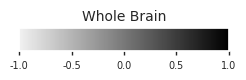

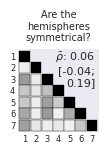

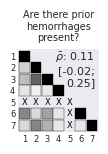

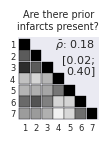

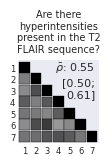

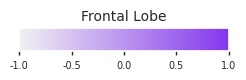

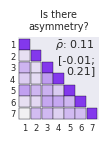

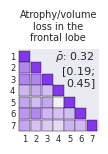

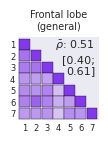

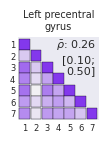

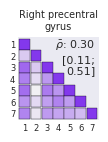

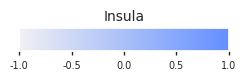

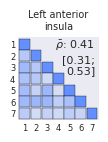

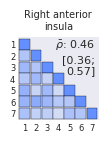

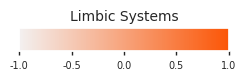

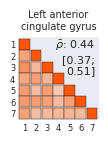

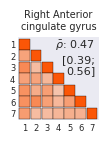

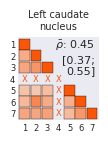

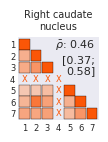

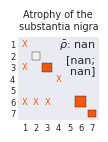

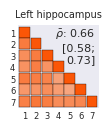

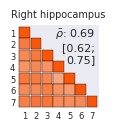

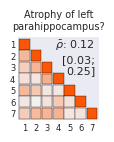

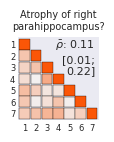

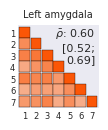

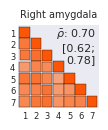

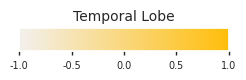

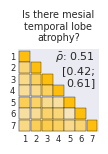

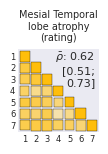

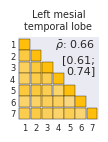

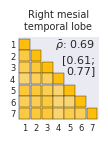

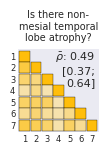

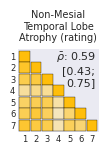

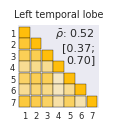

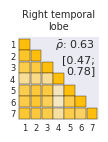

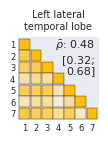

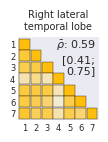

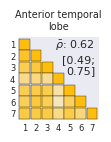

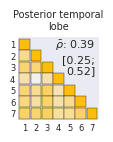

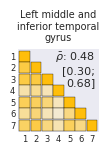

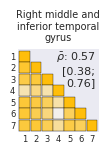

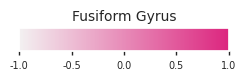

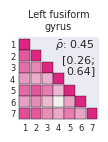

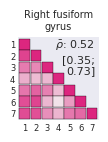

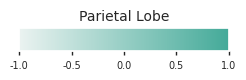

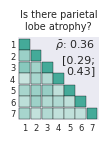

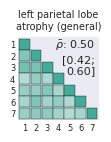

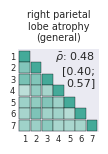

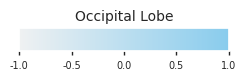

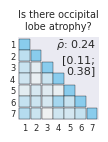

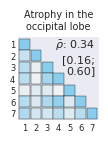

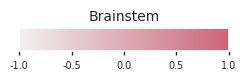

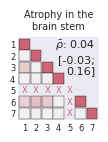

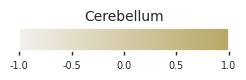

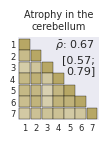

In [64]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import textwrap
from scipy.stats import pearsonr, sem
import sklearn
import warnings
from scipy.stats import bootstrap
import warnings

# Ignore all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

sns.set(style="dark")
# mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.family'] = 'DejaVu LGC Sans'#'C059'#'Nimbus Roman'
# not bold
mpl.rcParams['font.weight'] = 'normal'
all_values = []


# Create categories
categories = {
    "Whole_Brain": [
        'Are the hemispheres symmetrical?',
        'Are there prior hemorrhages present?',
        'Are there prior infarcts present?',
        'Are there hyperintensities present in the T2 FLAIR sequence?'
    ],
    "Frontal_Lobe": [
        'Is there asymmetry?',
        'Atrophy/volume loss in the frontal lobe',
        'Frontal lobe (general)',
        'Left precentral gyrus',
        'Right precentral gyrus'
    ],
    "Insula": [
        'Left anterior insula',
        'Right anterior insula'
    ],
    "Limbic_Systems": {
        "Cingulate_Gyrus": [
            'Left anterior cingulate gyrus',
            'Right Anterior cingulate gyrus'
        ],
        "Basal_Ganglia": [
            'Left caudate nucleus',
            'Right caudate nucleus',
            'Atrophy of the substantia nigra'
        ],
        "Hippocampus": [
            'Left hippocampus',
            'Right hippocampus'
        ],
        "Parahippocampus": [
            'Atrophy of left parahippocampus?',
            'Atrophy of right parahippocampus?'
        ],
        "Amygdala": [
            'Left amygdala',
            'Right amygdala'
        ]
    },
    "Temporal_Lobe": [
        'Is there mesial temporal lobe atrophy?',
        'Mesial Temporal lobe atrophy (rating) ',
        'Left mesial temporal lobe',
        'Right mesial temporal lobe',
        'Is there non-mesial temporal lobe atrophy?',
        'Non-Mesial Temporal Lobe Atrophy (rating)',
        'Left temporal lobe',
        'Right temporal lobe',
        'Left lateral temporal lobe',
        'Right lateral temporal lobe',
        'Anterior temporal lobe',
        'Posterior temporal lobe',
        'Left middle and inferior temporal gyrus',
        'Right middle and  inferior temporal gyrus'
    ],
    "Fusiform_Gyrus": [
        'Left fusiform gyrus',
        'Right fusiform gyrus'
    ],
    "Parietal_Lobe": [
        'Is there parietal lobe atrophy?',
        'left parietal lobe atrophy (general)',
        'right parietal lobe atrophy (general)'
    ],
    "Occipital_Lobe": [
        'Is there occipital lobe atrophy?',
        'Atrophy in the occipital lobe'
    ],
    "Brainstem": [
        'Atrophy in the brain stem'
    ],
    "Cerebellum": [
        'Atrophy in the cerebellum'
    ]
}


# Dictionary to store unique continuous color palettes for each category
color_schemes = {
    'Whole_Brain': sns.light_palette("#000000", as_cmap=True),
    'Frontal_Lobe': sns.light_palette("#8338ec", as_cmap=True),
    'Insula': sns.light_palette("#648FFF", as_cmap=True),
    'Limbic_Systems': sns.light_palette("#fb5607", as_cmap=True),
    'Temporal_Lobe': sns.light_palette("#ffbe0b", as_cmap=True),
    'Fusiform_Gyrus': sns.light_palette("#DC267F", as_cmap=True),
    'Parietal_Lobe': sns.light_palette("#44AA99", as_cmap=True),
    'Occipital_Lobe': sns.light_palette("#89CCED", as_cmap=True),
    'Brainstem': sns.light_palette("#CC6677", as_cmap=True),
    'Cerebellum': sns.light_palette("#B7A765", as_cmap=True)
}





table_2 = pd.DataFrame()
def calc_agreement_matrix(region_idx):
    region = region_ratings_data_array[:, :, region_idx]
    pearson_corr_matrix = np.zeros((7, 7))
    sizes = np.zeros((7, 7))
    unique_values = np.unique(region[~np.isnan(region)])
    num_categories = len(unique_values)

    for rad_1 in range(region.shape[0]):
        for rad_2 in range(rad_1, region.shape[0]):
            # Find indices where neither rad_1 nor rad_2 have a NaN
            valid_indices = ~np.isnan(region[rad_1]) & ~np.isnan(region[rad_2])

            filtered_rad_1 = region[rad_1][valid_indices]
            filtered_rad_2 = region[rad_2][valid_indices]

            # Compute correlation
            try:
                pearson_coeff, _ = pearsonr(filtered_rad_1, filtered_rad_2)
                '''
                with warnings.catch_warnings():
                    warnings.simplefilter("error", RuntimeWarning)  # Treat RuntimeWarnings as errors
                    weighted_kappa = sklearn.metrics.cohen_kappa_score(filtered_rad_1, filtered_rad_2, weights='quadratic')
                '''
            except:
                if len(filtered_rad_1) == 0:
                    print(f"no valid ratings for rad_1 {rad_1} for region {region_names[region_idx]}")
                    pearson_coeff = np.nan
                elif np.var(filtered_rad_1) == 0 or np.var(filtered_rad_2) == 0:
                    print(f"zero variances for rad_1 {rad_1} and rad_2 {rad_2} for region {region_names[region_idx]}")
                    pearson_coeff = np.nan

            
            pearson_corr_matrix[rad_1, rad_2] = pearson_coeff
            sizes[rad_1, rad_2] = len(filtered_rad_1)
    
    return pearson_corr_matrix, sizes

# Function to plot relplot
def plot_relplot(matrix, size_data, img_path, color_scheme):
    df_matrix = pd.DataFrame(matrix)

    # Rename the columns and index if needed (optional)
    df_matrix.columns = [f'Rad_{i+1}' for i in range(7)]
    df_matrix.index = [f'Rad_{i+1}' for i in range(7)]

    # Melt the DataFrame to long form
    df_melted = df_matrix.reset_index().melt(id_vars='index', value_vars=df_matrix.columns)
    df_melted.columns = ['Radiologist_1', 'Radiologist_2', 'Value']
    
    df_size_data = pd.DataFrame(size_data)

    df_size_data.columns = [f'Rad_{i+1}' for i in range(7)]
    df_size_data.index = [f'Rad_{i+1}' for i in range(7)]

    df_size_melted = df_size_data.reset_index().melt(id_vars='index', value_vars=df_size_data.columns)
    df_size_melted.columns = ['Radiologist_1', 'Radiologist_2', 'Size']

    # Merge the melted DataFrames on the radiologist columns
    df_final = pd.merge(df_melted, df_size_melted, on=['Radiologist_1', 'Radiologist_2'])
    
    g = sns.relplot(x="Radiologist_1", y="Radiologist_2",
                    hue="Value", size="Size",
                    palette=color_scheme,
                    marker="s", linewidth=0.25, edgecolor = 'black', legend=False,
                    aspect=1.2, data=df_final, sizes=(0, 60))
    nan_positions = np.column_stack(np.where(np.isnan(matrix) & (size_data > 0)))
    
    # Plot 'X' markers at the positions of the NaN values
    for pos in nan_positions:
        g.ax.text(pos[0], pos[1], 'X', ha='center', va='center', color=color_scheme(1.0), size = 6)  # Adjust color and alignment as needed

    lower_triangle_values = matrix.T[np.tril_indices(7, k=-1)]
    all_values.append(lower_triangle_values)
    # Calculate the mean and 95% confidence interval
    # mean_corr = np.nanmean(lower_triangle_values)
    # sem_corr = sem(lower_triangle_values, nan_policy='omit')  # Standard error of the mean
    # ci_corr = 1.96 * sem_corr  # 95% CI
    # raise ValueError
    # calculate ci with bootstrapping
    # ci_bounds_corr = bootstrap.ci(data=lower_triangle_values, statfunction=np.nanmean, n_samples=10000, method='bca')['confidence_interval']
    # print(ci_bounds_corr)

    mean, ci_bounds = bootstrap_mean_ci_from_corr_matrix(matrix, num_bootstrap_samples=10000, ci=0.95)

    # add the data to table_2
    table_2.loc[question, 'Mean'] = mean
    table_2.loc[question, 'CI_Lower'] = ci_bounds[0]
    table_2.loc[question, 'CI_Upper'] = ci_bounds[1]


    text_x = 6.3  # Choose your x coordinate
    text_y = -0.5  # Choose your y coordinate
    g.ax.text(text_x, text_y, f'$\\bar{{ρ}}$: {mean:.2f}\n[{ci_bounds[0]:.2f};\n{ci_bounds[1]:.2f}]',
        fontdict={'size': 8},
        horizontalalignment='right',  # Right-align text
        verticalalignment='top',)  # Top-align text
        # bbox=dict(facecolor='grey', alpha=0.4, edgecolor=None, boxstyle='round,pad=0.3'))  # Background


    g.ax.spines['bottom'].set_visible(False)
    g.ax.spines['left'].set_visible(False)

    # Get current x and y tick labels
    current_xticks = [label.get_text() for label in g.ax.get_xticklabels()]
    current_yticks = [label.get_text() for label in g.ax.get_yticklabels()]

    # Update them
    new_xticks = [label.split('_')[-1] for label in current_xticks]
    new_yticks = [label.split('_')[-1] for label in current_yticks]

    # Set them back to the plot
    warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")
    g.ax.set_xticklabels(new_xticks, size = 6)
    g.ax.set_yticklabels(new_yticks, size = 6)
    g.ax.tick_params(axis='x', which='major', pad=-4)  # for x-axis
    g.ax.tick_params(axis='y', which='major', pad=-4)  # for y-axis
    g.ax.set_xlim(-0.6, 6.6)  # this goes from -0.5 to 8.5
    g.ax.set_ylim(6.6, -0.6)  # this goes from -0.5 to 8.5

    g.set_axis_labels("", "")

    wrapped_title = textwrap.fill(question, width=18)  # Wrap to 20 characters per line
    g.ax.set_title(wrapped_title, size=7)
    g.fig.set_size_inches(1, 1)  # width, height in inches

    
    g.savefig(img_path)


for category, questions in categories.items():
    # Create directory if it doesn't exist
    dir_path = f"./radiologist_region_interreliability/{category}"
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    
    # Change the color scheme based on the category
    color_scheme = color_schemes[category]

    fig, ax = plt.subplots(figsize=(2.7, 0.75))
    fig.subplots_adjust(bottom=0.3, top=0.6)

    cmap = color_scheme
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)

    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    ax.tick_params(axis='x', which='major', size=3, width=1)  # Adjust size and width as desired
    ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    ax.set_xticklabels(labels = [-1.0,-0.5,0.0,0.5,1.0], size = 7)
    ax.set_title(str(category).replace("_", " "), size = 10)
    colorbar_path = f"{dir_path}/legend.svg"
    fig.savefig(colorbar_path)

    if isinstance(questions, list):  # Check if questions is a list
        question_list = questions
    elif isinstance(questions, dict):  # Check if questions is a dictionary
        question_list = []
        for sub_category, sub_questions in questions.items():
            question_list.extend(sub_questions)
    else:
        raise ValueError("Unknown type for questions")
    
    for question in question_list:
        try:
            index = region_names.index(question)
        except ValueError:
            raise ValueError("Question {question} not found in `region_names`")

        # Calculate matrix and sizes
        matrix, size = calc_agreement_matrix(index)
        
        # Set path for saving the plot
        safe_question = question.replace(' ', '_').replace('?', '').replace('/', '_')
        img_path = f"{dir_path}/plot_{safe_question}.svg"

        # Plot and save using the color scheme
        plot_relplot(matrix, size, img_path, color_scheme)



In [65]:
# format table_2 with 3 decimal places
table_2 = table_2.round(3)
table_2.to_csv('/projectnb/vkolagrp/spuduch/plots/table_2.csv', index = True)
table_2

,Mean,CI_Lower,CI_Upper
Are the hemispheres symmetrical?,0.060,-0.042,0.185
Are there prior hemorrhages present?,0.113,-0.023,0.248
Are there prior infarcts present?,0.184,0.021,0.398
Are there hyperintensities present in the T2 FLAIR sequence?,0.549,0.497,0.606
Is there asymmetry?,0.113,-0.009,0.211
Atrophy/volume loss in the frontal lobe,0.319,0.186,0.452
Frontal lobe (general),0.515,0.401,0.609
Left precentral gyrus,0.263,0.098,0.501
Right precentral gyrus,0.304,0.113,0.513
Left anterior insula,0.409,0.306,0.527


# Fastsurfer

In [17]:
fastsurfer_df = pd.read_csv("/home/spuduch/RadiologistRatings/fast_surfer_volumes.csv")
# fastsurfer_df.columns.to_list()

In [18]:
field_mapping = {
    # 'Are the hemispheres symmetrical?': ['Left-Cerebral-White-Matter', 'Right-Cerebral-White-Matter'],
    # 'Are there prior hemorrhages present?': None,
    # 'Are there prior infarcts present?': None,
    # 'Are there hyperintensities present in the T2 FLAIR sequence?': ['WM-hypointensities'],
    # 'Is there asymmetry?': ['Left-Cerebral-White-Matter', 'Right-Cerebral-White-Matter'],
    'Atrophy/volume loss in the frontal lobe': [
        'ctx-lh-superiorfrontal', 'ctx-rh-superiorfrontal',
        'ctx-lh-rostralmiddlefrontal', 'ctx-rh-rostralmiddlefrontal',
        'ctx-lh-caudalmiddlefrontal', 'ctx-rh-caudalmiddlefrontal',
        'ctx-lh-parsopercularis', 'ctx-rh-parsopercularis',
        'ctx-lh-parsorbitalis', 'ctx-rh-parsorbitalis',
        'ctx-lh-parstriangularis', 'ctx-rh-parstriangularis',
        'ctx-lh-precentral', 'ctx-rh-precentral',
        'ctx-lh-medialorbitofrontal', 'ctx-rh-medialorbitofrontal',
        'ctx-lh-lateralorbitofrontal', 'ctx-rh-lateralorbitofrontal'

    ],
    'Frontal lobe (general)': [
        'ctx-lh-superiorfrontal', 'ctx-rh-superiorfrontal',
        'ctx-lh-rostralmiddlefrontal', 'ctx-rh-rostralmiddlefrontal',
        'ctx-lh-caudalmiddlefrontal', 'ctx-rh-caudalmiddlefrontal',
        'ctx-lh-parsopercularis', 'ctx-rh-parsopercularis',
        'ctx-lh-parsorbitalis', 'ctx-rh-parsorbitalis',
        'ctx-lh-parstriangularis', 'ctx-rh-parstriangularis',
        'ctx-lh-precentral', 'ctx-rh-precentral',
        'ctx-lh-medialorbitofrontal', 'ctx-rh-medialorbitofrontal',
        'ctx-lh-lateralorbitofrontal', 'ctx-rh-lateralorbitofrontal'
    ],
    'Left anterior insula': ['ctx-lh-insula'], # Check this
    'Right anterior insula': ['ctx-rh-insula'], # Check this
    'Left anterior cingulate gyrus': ['ctx-lh-rostralanteriorcingulate'],
    'Right Anterior cingulate gyrus': ['ctx-rh-rostralanteriorcingulate'],
    'Left precentral gyrus': ['ctx-lh-precentral'],
    'Right precentral gyrus': ['ctx-rh-precentral'],
    'Left caudate nucleus': ['Left-Caudate'],
    'Right caudate nucleus': ['Right-Caudate'],
    # 'Is there mesial temporal lobe atrophy?': ['Left-Hippocampus', 'Right-Hippocampus'],
    'Mesial Temporal lobe atrophy (rating) ': ['ctx-lh-middletemporal','ctx-rh-middletemporal'], # Check this
    # 'Left mesial temporal lobe': 'Left-Hippocampus',  # Check this
    # 'Right mesial temporal lobe': 'Right-Hippocampus', # Check this
    'Left hippocampus': ['Left-Hippocampus'],
    'Right hippocampus': ['Right-Hippocampus'],
    'Left amygdala': ['Left-Amygdala'],
    'Right amygdala': ['Right-Amygdala'],
    'Atrophy of left parahippocampus?': ['ctx-lh-parahippocampal'],
    'Atrophy of right parahippocampus?': ['ctx-rh-parahippocampal'],
    # 'Is there non-mesial temporal lobe atrophy?': ['ctx-lh-inferiortemporal', 'ctx-rh-inferiortemporal'],
    'Non-Mesial Temporal Lobe Atrophy (rating)': ['ctx-lh-transversetemporal','ctx-rh-transversetemporal'],
    'Left temporal lobe': ['ctx-lh-transversetemporal', 'ctx-lh-middletemporal'],
    'Right temporal lobe': ['ctx-rh-transversetemporal', 'ctx-rh-middletemporal'],
    'Left lateral temporal lobe': ['ctx-lh-transversetemporal'],
    'Right lateral temporal lobe': ['ctx-rh-transversetemporal'],
    # 'Anterior temporal lobe': ['ctx-lh-entorhinal', 'ctx-rh-entorhinal', ],
    'Posterior temporal lobe': [ # need to check
        'ctx-lh-parahippocampal', 'ctx-rh-parahippocampal',
        'ctx-lh-fusiform', 'ctx-rh-fusiform',
        'ctx-lh-superiortemporal', 'ctx-rh-superiortemporal',
        'ctx-lh-middletemporal', 'ctx-rh-middletemporal',
        'ctx-lh-inferiortemporal', 'ctx-rh-inferiortemporal',
        'ctx-lh-transversetemporal', 'ctx-rh-transversetemporal'
    ],
    'Left fusiform gyrus': ['ctx-lh-fusiform'],
    'Right fusiform gyrus': ['ctx-rh-fusiform'],
    'Left middle and inferior temporal gyrus': ['ctx-lh-middletemporal', 'ctx-lh-inferiortemporal'],
    'Right middle and  inferior temporal gyrus': ['ctx-rh-middletemporal', 'ctx-rh-inferiortemporal'],
    'Is there parietal lobe atrophy?': ['ctx-lh-superiorparietal', 'ctx-rh-superiorparietal', 'ctx-lh-inferiorparietal', 'ctx-rh-inferiorparietal'],
    'left parietal lobe atrophy (general)': ['ctx-lh-inferiorparietal', 'ctx-lh-superiorparietal'],
    'right parietal lobe atrophy (general)': ['ctx-rh-inferiorparietal', 'ctx-rh-superiorparietal'],
    'Is there occipital lobe atrophy?': [
        'ctx-lh-lingual','ctx-rh-lingual',
        'ctx-lh-pericalcarine', 'ctx-rh-pericalcarine',
        'ctx-lh-cuneus', 'ctx-rh-cuneus',
        'ctx-lh-lateraloccipital', 'ctx-rh-lateraloccipital'],
    'Atrophy in the occipital lobe': [
        'ctx-lh-lingual','ctx-rh-lingual',
        'ctx-lh-pericalcarine', 'ctx-rh-pericalcarine',
        'ctx-lh-cuneus', 'ctx-rh-cuneus',
        'ctx-lh-lateraloccipital', 'ctx-rh-lateraloccipital'],
    'Atrophy in the brain stem': ['Brain-Stem'],
    # 'Atrophy of the substantia nigra': None,
    'Atrophy in the cerebellum': ['Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex'],
}


In [19]:
#make sure all the values in field_mapping exist as columns in fastsurfer_df
for key, item in field_mapping.items():
    if item == None:
        continue
    if isinstance(item, list):
        for col in item:
            if col not in fastsurfer_df:
                print(f"{col} from {key} doesn't exist")
    else:
        if item not in fastsurfer_df.columns:
            print(f"{item} doesn't exist")
    if key not in consensus_rating_df:
        print(f"{key} doesn't exist")

#make sure all the keys in field_mapping exist as columns in consensus_rating_df

In [20]:
consensus_rating_df.reset_index(inplace=True)
consensus_rating_df["Case_ID"] = consensus_rating_df["pt"].apply(lambda x: "CASE_" + str(x))
consensus_rating_df = consensus_rating_df.set_index('Case_ID')

In [21]:
fastsurfer_df = fastsurfer_df.set_index('Case_ID')

In [22]:
aux_df = pd.DataFrame(index=fastsurfer_df.index)

# Sum the columns in fastsurfer_df as specified in field_mapping
for key, columns in field_mapping.items():
    if columns is not None:
        # Safeguard against missing columns
        if all(col in fastsurfer_df.columns for col in columns):
            aux_df[key + '_summed'] = fastsurfer_df[columns].sum(axis=1)
        else:
            print(f"Missing columns for {key}: {[col for col in columns if col not in fastsurfer_df.columns]}")

# Merge consensus_rating_df with aux_df based on 'Case_ID'
merged_df = consensus_rating_df.join(aux_df, how='inner')

# Check for any issues post-merge
print(merged_df.head())  # Preview the merged DataFrame to check for issues


         pt  id redcap_survey_identifier adrd_radiologist_task_timestamp  \
Case_ID                                                                    
CASE_1    1   5                     None                 7/11/2023 22:42   
CASE_2    2   6                     None                 7/11/2023 22:55   
CASE_3    3   7                     None                 7/11/2023 23:05   
CASE_4    4   8                     None                 7/11/2023 23:16   
CASE_5    5   9                     None                 7/11/2023 23:37   

        participant_id      doctor       date  \
Case_ID                                         
CASE_1               1  aaron paul  7/24/2023   
CASE_2               2  aaron paul  7/24/2023   
CASE_3               3  aaron paul  7/24/2023   
CASE_4               4  aaron paul  7/24/2023   
CASE_5               5  aaron paul  7/24/2023   

         Are the hemispheres symmetrical?  \
Case_ID                                     
CASE_1                           

corr

In [23]:
from scipy.stats import spearmanr

correlation_results = {}
for key in field_mapping:
    summed_key = key + '_summed'
    if summed_key in merged_df.columns:
        corr, p_value = spearmanr(merged_df[key], merged_df[summed_key])
        correlation_results[key] = (corr, p_value)
    else:
        print(f"Missing summed data for key: {summed_key}")

# Display the results
for region, (corr, p_value) in correlation_results.items():
    print(f"{region}: Correlation = {corr:.2f}, P-value = {p_value:.3f}")


Atrophy/volume loss in the frontal lobe: Correlation = -0.28, P-value = 0.023
Frontal lobe (general): Correlation = -0.25, P-value = 0.044
Left anterior insula: Correlation = -0.11, P-value = 0.377
Right anterior insula: Correlation = -0.16, P-value = 0.205
Left anterior cingulate gyrus: Correlation = -0.05, P-value = 0.714
Right Anterior cingulate gyrus: Correlation = -0.09, P-value = 0.472
Left precentral gyrus: Correlation = -0.15, P-value = 0.238
Right precentral gyrus: Correlation = -0.13, P-value = 0.288
Left caudate nucleus: Correlation = -0.34, P-value = 0.005
Right caudate nucleus: Correlation = -0.31, P-value = 0.009
Mesial Temporal lobe atrophy (rating) : Correlation = -0.39, P-value = 0.001
Left hippocampus: Correlation = -0.46, P-value = 0.000
Right hippocampus: Correlation = -0.63, P-value = 0.000
Left amygdala: Correlation = -0.48, P-value = 0.000
Right amygdala: Correlation = -0.58, P-value = 0.000
Atrophy of left parahippocampus?: Correlation = 0.05, P-value = 0.700
At

/home/spuduch/anaconda3/envs/adrd2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


# comparison to diagnoses

### radiologist confidence scores

/home/spuduch/anaconda3/envs/adrd2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


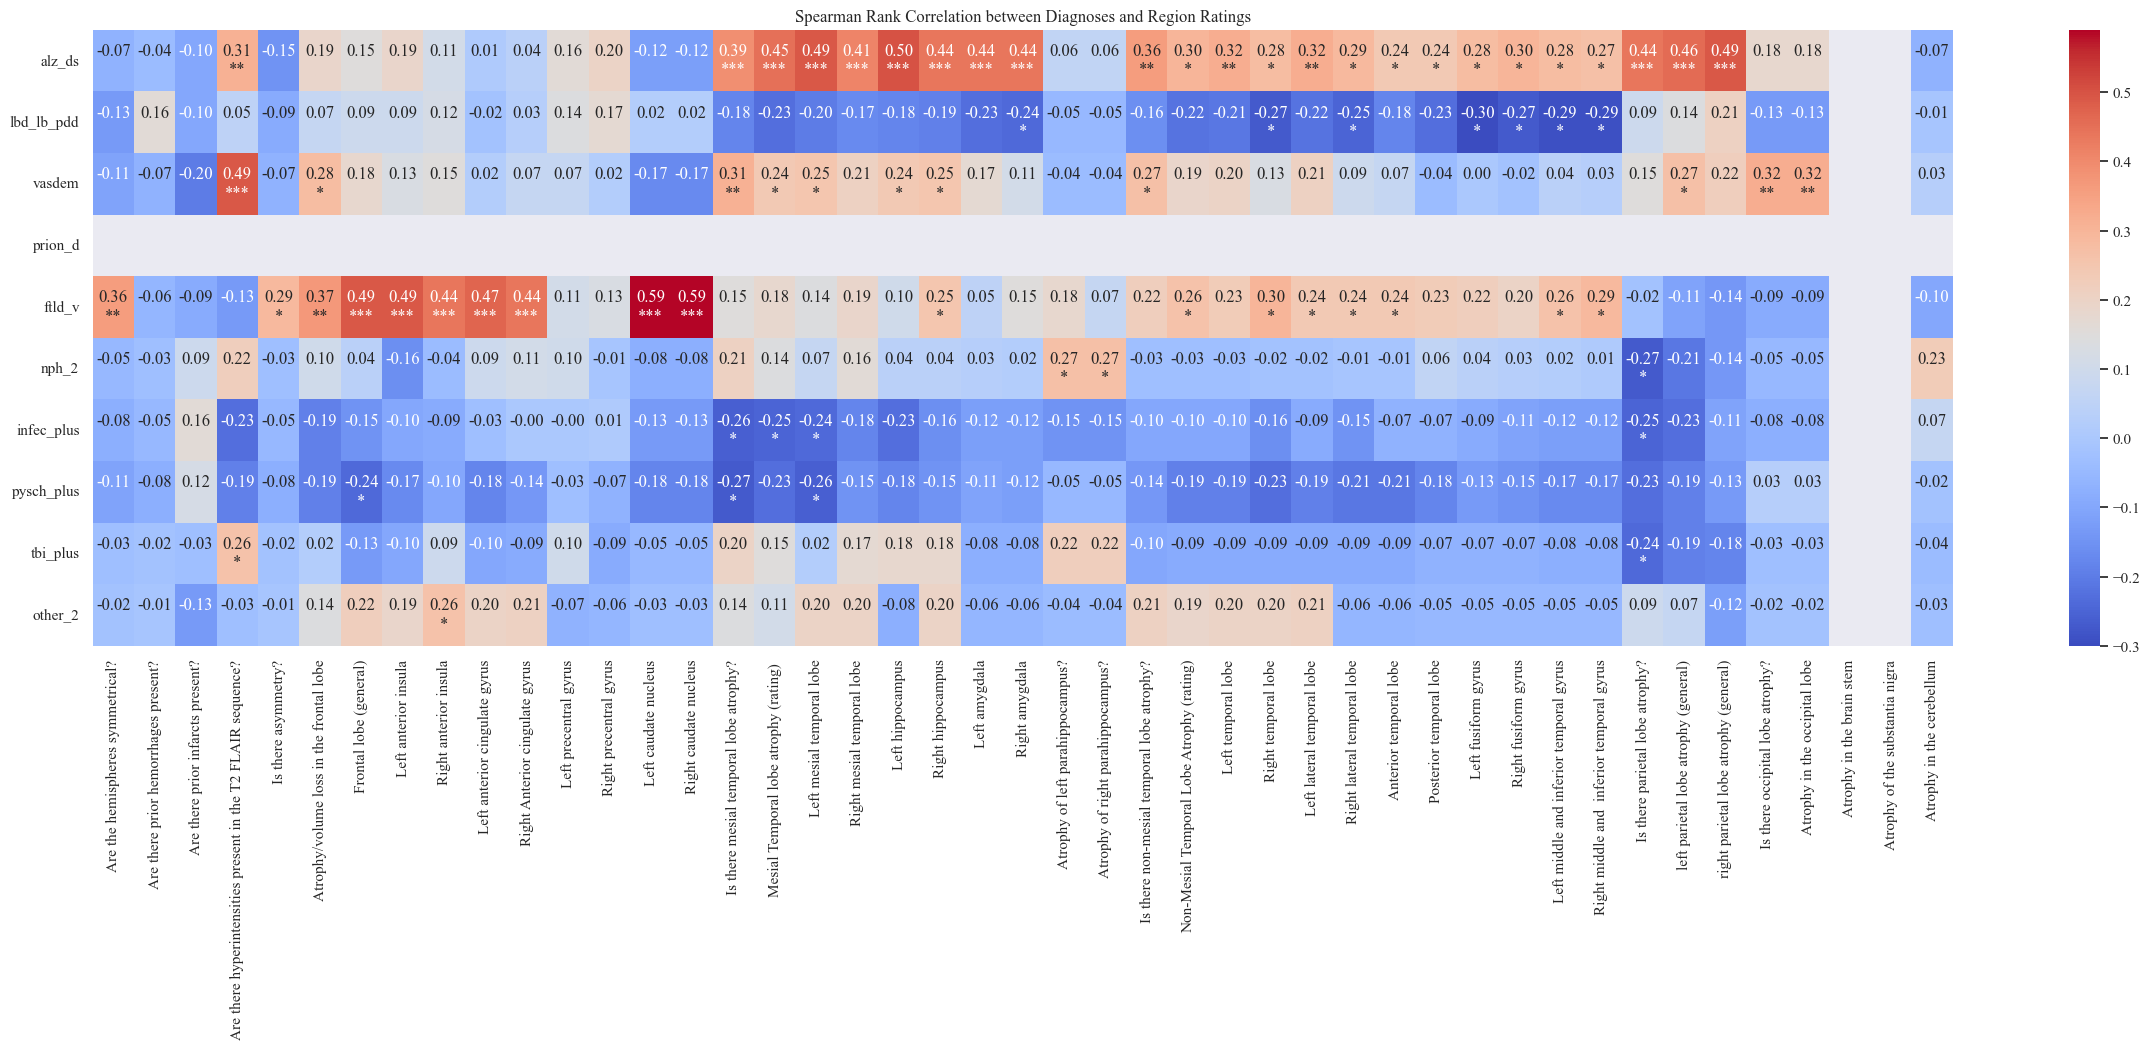

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Assuming 'cleaned_data' is your DataFrame and the columns are appropriately defined
# Prepare your data subsets
diagnosis_data = consensus_rating_df[redcap_columns]
region_data = consensus_rating_df[region_names]

# Initialize the correlation matrix and the p-value matrix
correlation_matrix = pd.DataFrame(index=redcap_columns, columns=region_names)
p_value_matrix = pd.DataFrame(index=redcap_columns, columns=region_names)

# Calculate correlations and p-values for each pair
for diagnosis in redcap_columns:
    for region in region_names:
        corr, p_value = spearmanr(diagnosis_data[diagnosis], region_data[region])
        correlation_matrix.at[diagnosis, region] = f"{corr:.2f}"
        p_value_matrix.at[diagnosis, region] = p_value

# Convert p-values to significance stars
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Create a combined annotation matrix
combined_annotations = correlation_matrix.astype(str) + "\n" + p_value_matrix.applymap(significance_stars)

# Plotting the heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix.astype(float), annot=combined_annotations, cmap='coolwarm', fmt='')
plt.title('Spearman Rank Correlation between Diagnoses and Region Ratings')
plt.show()


### Now assessing ground truth

In [26]:
consensus_rating_df['pt_index'] = consensus_rating_df['pt'] - 1

In [27]:
# create a full_df that merges the cleaned_data with diagnosis_cases 
# the merge should be done on the 'pt' column (-1 because indexing is based on zero while pt is absed on one) 
# from cleaned_data with the index from diagnosis_cases

full_df = consensus_rating_df.merge(diagnosis_cases, left_on='pt_index', right_index=True)

/tmp/ipykernel_3020820/190433999.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = full_df.corr(method='spearman')


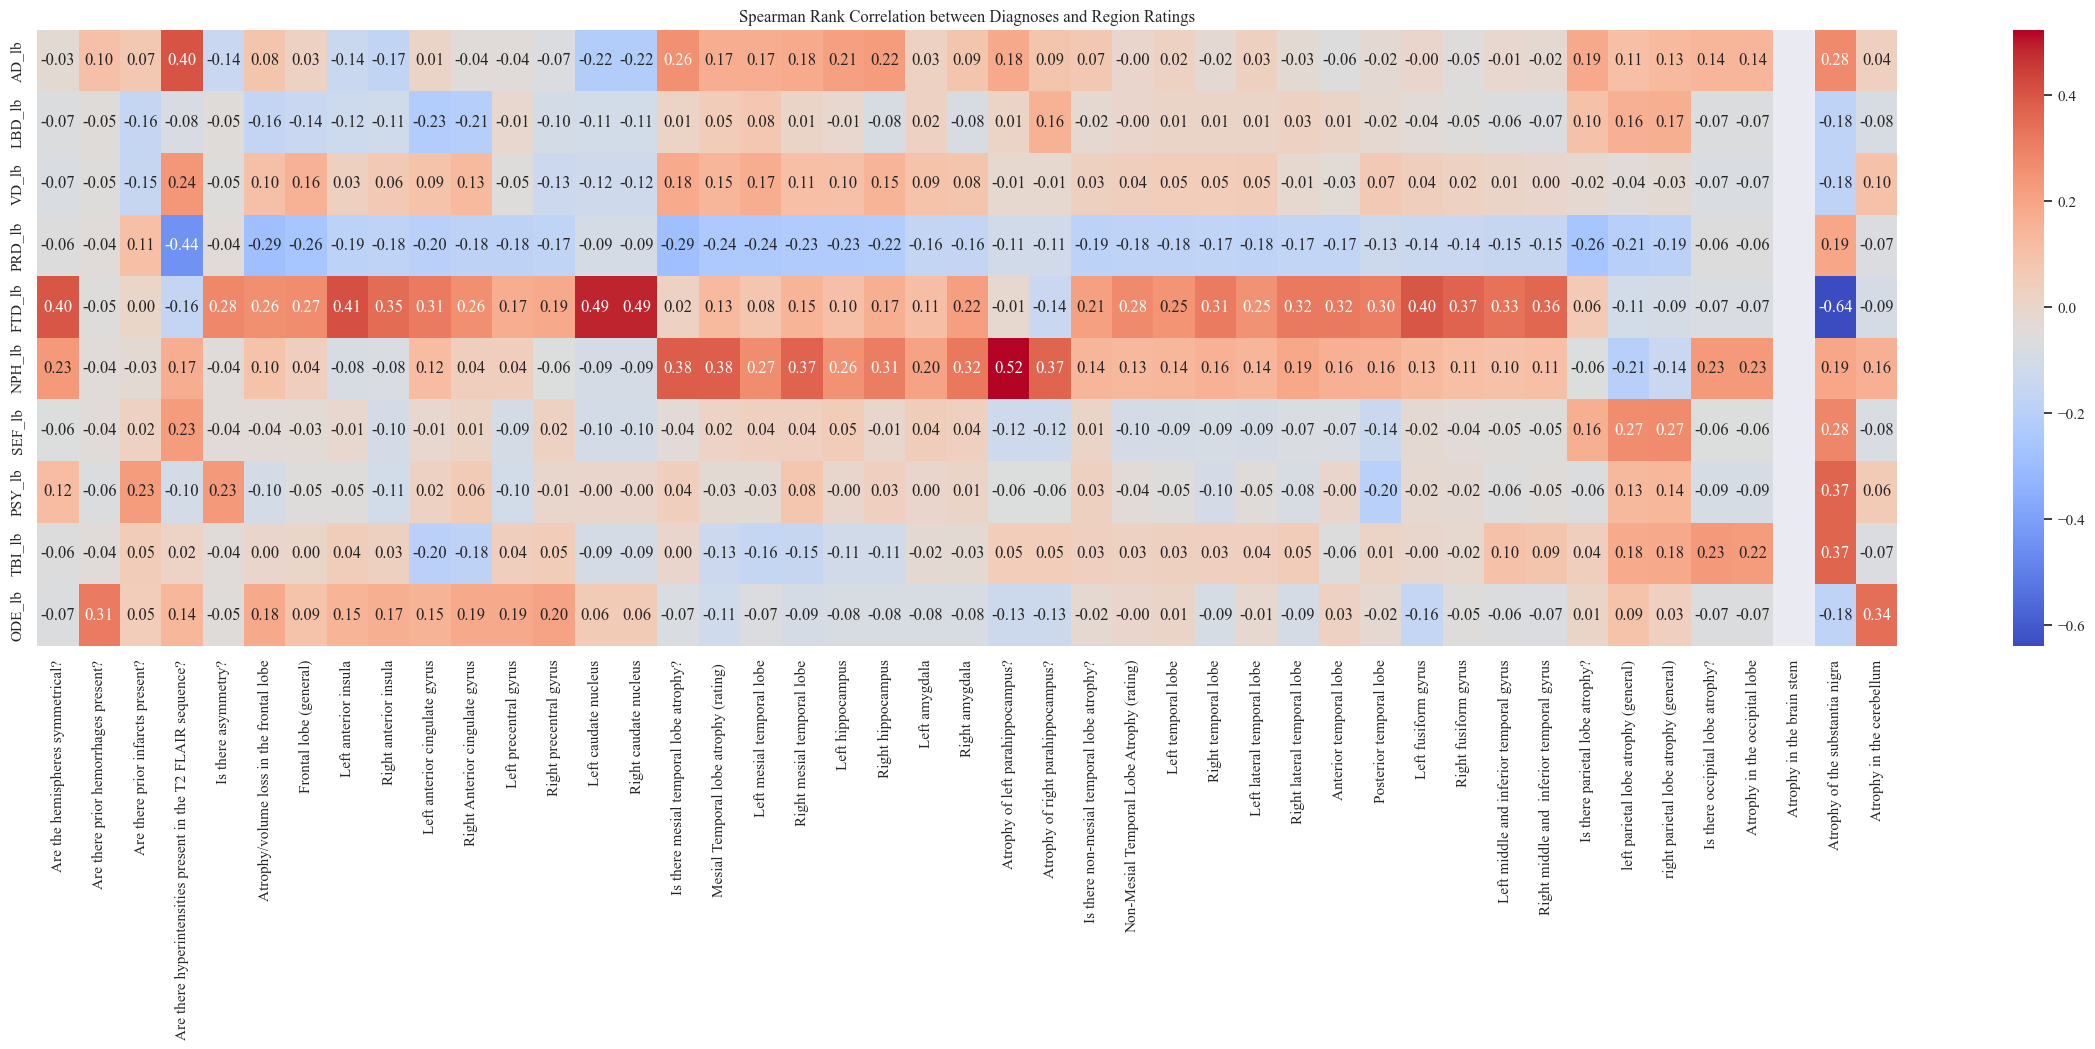

In [28]:
# now do the same thing but with the `cleaned_data[region_columns]` and `diagnosis_cases`, which has the ground truth labels

# Calculate the spearman rank correlation matrix between each diagnosis and each region rating
corr_matrix = full_df.corr(method='spearman')

# Extract the relevant section of the correlation matrix (diagnoses vs. regions)
relevant_corr_matrix = corr_matrix.loc[diagnosis_columns, region_names]


# Plotting the heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(relevant_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation between Diagnoses and Region Ratings')
plt.show()

In [45]:
diagnosis_cases['Case_ID'] = diagnosis_cases.index.map(lambda x: "CASE_" + str(x + 1))
diagnosis_cases


,AD_lb,LBD_lb,VD_lb,PRD_lb,FTD_lb,NPH_lb,SEF_lb,PSY_lb,TBI_lb,ODE_lb,Case_ID
0,1,0,0,0,0,0,1,1,0,0,CASE_1
1,1,0,0,0,0,0,1,1,0,0,CASE_2
2,1,0,0,0,0,0,0,0,1,0,CASE_3
3,1,0,0,0,0,0,1,1,0,0,CASE_4
4,0,0,0,0,0,0,0,0,0,1,CASE_5
...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,1,0,0,0,CASE_66
66,0,0,0,0,1,0,0,0,0,0,CASE_67
67,0,0,0,0,1,0,0,0,0,0,CASE_68
68,1,0,0,0,0,1,0,0,0,0,CASE_69


True


/home/spuduch/anaconda3/envs/adrd2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/spuduch/anaconda3/envs/adrd2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/spuduch/anaconda3/envs/adrd2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/spuduch/anaconda3/envs/adrd2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/spuduch/anaconda3/envs/adrd2/lib/python3.1

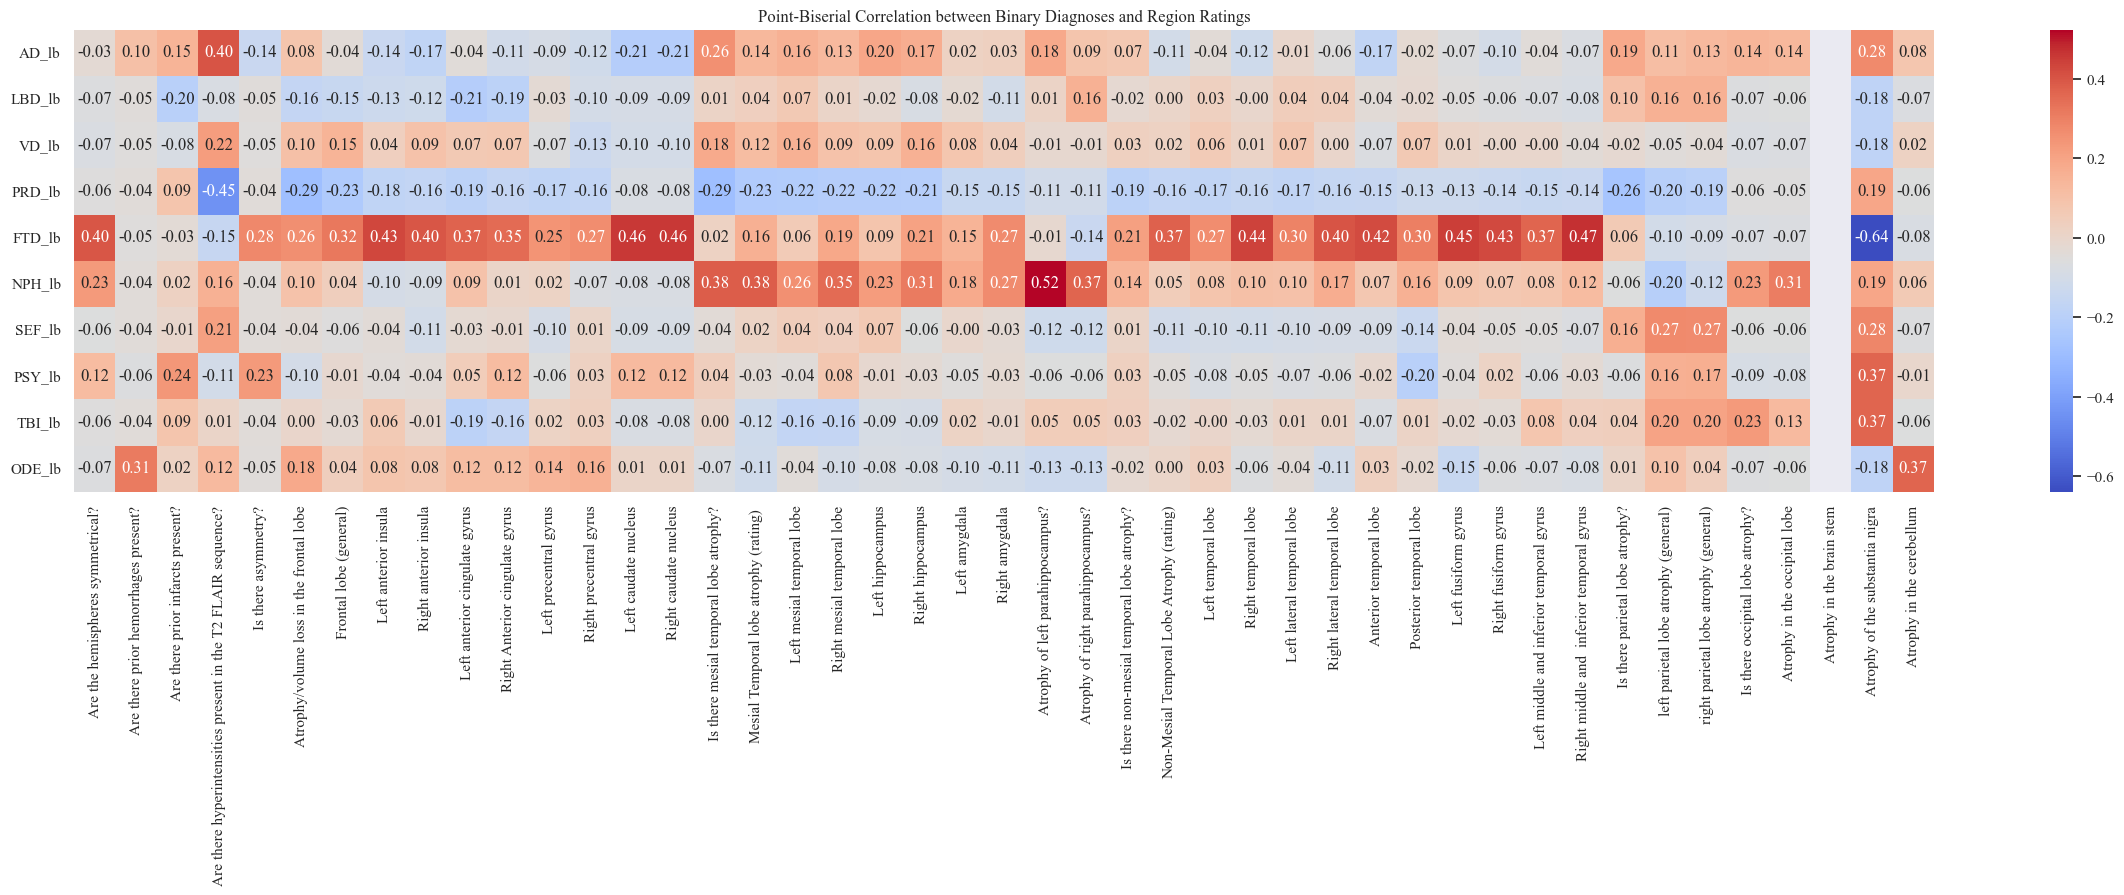

In [48]:
# consensus_rating_df.set_index('Case_ID', inplace=True, drop=True)
# diagnosis_cases.set_index('Case_ID', inplace=True, drop=True)

# Verify indices are now aligned by checking their equivalence
print(consensus_rating_df.index.equals(diagnosis_cases.index))  # Should print True if they are aligned


correlation_matrix = pd.DataFrame(index=diagnosis_columns, columns=region_columns)
p_value_matrix = pd.DataFrame(index=diagnosis_columns, columns=region_columns)

for diagnosis in diagnosis_columns:
    for region in region_columns:
        # Filter out NaN values
        valid_data = consensus_rating_df[[region]].join(diagnosis_cases[[diagnosis]], how='inner').dropna()

        if not valid_data.empty:
            corr, p_value = pointbiserialr(valid_data[diagnosis], valid_data[region])
            correlation_matrix.loc[diagnosis, region] = corr
            p_value_matrix.loc[diagnosis, region] = p_value
        else:
            correlation_matrix.loc[diagnosis, region] = None
            p_value_matrix.loc[diagnosis, region] = None

# Plotting the correlation matrix
plt.figure(figsize=(30, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Point-Biserial Correlation between Binary Diagnoses and Region Ratings')
plt.show()



# Diagnostic Performance

In [58]:
confidence_columns = ['alz_ds', 'lbd_lb_pdd', 'vasdem', 'prion_d', 'ftld_v', 'nph_2', 'infec_plus', 'pysch_plus', 'tbi_plus', 'other_2']

In [60]:
cleaned_data.reset_index(inplace=True)
cleaned_data["Case_ID"] = cleaned_data["pt"].apply(lambda x: "CASE_" + str(x))
cleaned_data = cleaned_data.set_index('Case_ID')